## 난임 환자 대상 임신 성공 여부 예측

### LGAimers 6th 온라인 해커톤

Import

In [1]:
import pandas as pd
import lightgbm as lgb
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

### Data Load

In [2]:
import pandas as pd

# 데이터 로드
TRCMWS_train = pd.read_csv('../data/train_dataset_25_TRCMWS.csv')
TRCMWS_test = pd.read_csv('../data/test_dataset_25_TRCMWS.csv')

TRDQAZ_train = pd.read_csv('../data/train_dataset_25_TRDQAZ.csv')
TRDQAZ_test = pd.read_csv('../data/test_dataset_25_TRDQAZ.csv')

TRJXFG_train = pd.read_csv('../data/train_dataset_25_TRJXFG.csv')
TRJXFG_test = pd.read_csv('../data/test_dataset_25_TRJXFG.csv')

TRVNRY_train = pd.read_csv('../data/train_dataset_25_TRVNRY.csv')
TRVNRY_test = pd.read_csv('../data/test_dataset_25_TRVNRY.csv')

TRXQMD_train = pd.read_csv('../data/train_dataset_25_TRXQMD.csv')
TRXQMD_test = pd.read_csv('../data/test_dataset_25_TRXQMD.csv')

TRYBLT_train = pd.read_csv('../data/train_dataset_25_TRYBLT.csv')
TRYBLT_test = pd.read_csv('../data/test_dataset_25_TRYBLT.csv')

TRZKPL_train = pd.read_csv('../data/train_dataset_25_TRZKPL.csv')
TRZKPL_test = pd.read_csv('../data/test_dataset_25_TRZKPL.csv')

In [3]:
TRCMWS_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38089 entries, 0 to 38088
Data columns (total 90 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      38089 non-null  object 
 1   시술_당시_나이                38089 non-null  object 
 2   임신_시도_또는_마지막_임신_경과_연수   38089 non-null  object 
 3   시술_유형                   38089 non-null  object 
 4   배란_자극_여부                38089 non-null  int64  
 5   배란_유도_유형                38089 non-null  object 
 6   단일_배아_이식_여부             37257 non-null  float64
 7   착상_전_유전_검사_사용_여부        38089 non-null  float64
 8   착상_전_유전_진단_사용_여부        37257 non-null  float64
 9   남성_주_불임_원인              38089 non-null  int64  
 10  남성_부_불임_원인              38089 non-null  int64  
 11  여성_주_불임_원인              38089 non-null  int64  
 12  여성_부_불임_원인              38089 non-null  int64  
 13  부부_주_불임_원인              38089 non-null  int64  
 14  부부_부_불임_원인              38089 non-null

In [4]:
# ID 열을 제외한 특성과 타겟 변수 분리
TRCMWS_X = TRCMWS_train.drop(['임신_성공_여부', 'ID'], axis=1)
TRCMWS_y = TRCMWS_train['임신_성공_여부']

TRDQAZ_X = TRDQAZ_train.drop(['임신_성공_여부', 'ID'], axis=1)
TRDQAZ_y = TRDQAZ_train['임신_성공_여부']

TRJXFG_X = TRJXFG_train.drop(['임신_성공_여부', 'ID'], axis=1)
TRJXFG_y = TRJXFG_train['임신_성공_여부']

TRVNRY_X = TRVNRY_train.drop(['임신_성공_여부', 'ID'], axis=1)
TRVNRY_y = TRVNRY_train['임신_성공_여부']

TRXQMD_X = TRXQMD_train.drop(['임신_성공_여부', 'ID'], axis=1)
TRXQMD_y = TRXQMD_train['임신_성공_여부']

TRYBLT_X = TRYBLT_train.drop(['임신_성공_여부', 'ID'], axis=1)
TRYBLT_y = TRYBLT_train['임신_성공_여부']

TRZKPL_X = TRZKPL_train.drop(['임신_성공_여부', 'ID'], axis=1)
TRZKPL_y = TRZKPL_train['임신_성공_여부']

### 인코딩 

In [5]:
categorical_columns = [
    "시술_당시_나이",
    "임신_시도_또는_마지막_임신_경과_연수",
    "시술_유형",
    "배란_유도_유형",
    "배아_생성_주요_이유",
    "난자_출처",
    "정자_출처",
    "난자_기증자_나이",
    "정자_기증자_나이",
    "변환된_특정_시술_유형",
    "채취_해동_차이",
    "해동_혼합_차이",
    "혼합_이식_차이",
    "이식_해동_차이"
]

In [6]:
from sklearn.preprocessing import OrdinalEncoder

# 모든 범주형 변수를 문자열로 변환
TRCMWS_X[categorical_columns] = TRCMWS_X[categorical_columns].astype(str)
TRDQAZ_X[categorical_columns] = TRDQAZ_X[categorical_columns].astype(str)
TRJXFG_X[categorical_columns] = TRJXFG_X[categorical_columns].astype(str)
TRVNRY_X[categorical_columns] = TRVNRY_X[categorical_columns].astype(str)
TRXQMD_X[categorical_columns] = TRXQMD_X[categorical_columns].astype(str)
TRYBLT_X[categorical_columns] = TRYBLT_X[categorical_columns].astype(str)
TRZKPL_X[categorical_columns] = TRZKPL_X[categorical_columns].astype(str)

TRCMWS_test[categorical_columns] = TRCMWS_test[categorical_columns].astype(str)
TRDQAZ_test[categorical_columns] = TRDQAZ_test[categorical_columns].astype(str)
TRJXFG_test[categorical_columns] = TRJXFG_test[categorical_columns].astype(str)
TRVNRY_test[categorical_columns] = TRVNRY_test[categorical_columns].astype(str)
TRXQMD_test[categorical_columns] = TRXQMD_test[categorical_columns].astype(str)
TRYBLT_test[categorical_columns] = TRYBLT_test[categorical_columns].astype(str)
TRZKPL_test[categorical_columns] = TRZKPL_test[categorical_columns].astype(str)

# OrdinalEncoder를 사용하여 범주형 변수 인코딩
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

TRCMWS_X[categorical_columns] = encoder.fit_transform(TRCMWS_X[categorical_columns])
TRDQAZ_X[categorical_columns] = encoder.fit_transform(TRDQAZ_X[categorical_columns])
TRJXFG_X[categorical_columns] = encoder.fit_transform(TRJXFG_X[categorical_columns])
TRVNRY_X[categorical_columns] = encoder.fit_transform(TRVNRY_X[categorical_columns])
TRXQMD_X[categorical_columns] = encoder.fit_transform(TRXQMD_X[categorical_columns])
TRYBLT_X[categorical_columns] = encoder.fit_transform(TRYBLT_X[categorical_columns])
TRZKPL_X[categorical_columns] = encoder.fit_transform(TRZKPL_X[categorical_columns])

TRCMWS_test[categorical_columns] = encoder.transform(TRCMWS_test[categorical_columns])
TRDQAZ_test[categorical_columns] = encoder.transform(TRDQAZ_test[categorical_columns])
TRJXFG_test[categorical_columns] = encoder.transform(TRJXFG_test[categorical_columns])
TRVNRY_test[categorical_columns] = encoder.transform(TRVNRY_test[categorical_columns])
TRXQMD_test[categorical_columns] = encoder.transform(TRXQMD_test[categorical_columns])
TRYBLT_test[categorical_columns] = encoder.transform(TRYBLT_test[categorical_columns])
TRZKPL_test[categorical_columns] = encoder.transform(TRZKPL_test[categorical_columns])

## Modeling

In [7]:
from sklearn.model_selection import train_test_split

# 데이터 분할
TRCMWS_X_train, TRCMWS_X_test, TRCMWS_y_train, TRCMWS_y_test = train_test_split(TRCMWS_X, TRCMWS_y, test_size=0.2, random_state=42)
TRDQAZ_X_train, TRDQAZ_X_test, TRDQAZ_y_train, TRDQAZ_y_test = train_test_split(TRDQAZ_X, TRDQAZ_y, test_size=0.2, random_state=42)
TRJXFG_X_train, TRJXFG_X_test, TRJXFG_y_train, TRJXFG_y_test = train_test_split(TRJXFG_X, TRJXFG_y, test_size=0.2, random_state=42)
TRVNRY_X_train, TRVNRY_X_test, TRVNRY_y_train, TRVNRY_y_test = train_test_split(TRVNRY_X, TRVNRY_y, test_size=0.2, random_state=42)
TRXQMD_X_train, TRXQMD_X_test, TRXQMD_y_train, TRXQMD_y_test = train_test_split(TRXQMD_X, TRXQMD_y, test_size=0.2, random_state=42)
TRYBLT_X_train, TRYBLT_X_test, TRYBLT_y_train, TRYBLT_y_test = train_test_split(TRYBLT_X, TRYBLT_y, test_size=0.2, random_state=42)
TRZKPL_X_train, TRZKPL_X_test, TRZKPL_y_train, TRZKPL_y_test = train_test_split(TRZKPL_X, TRZKPL_y, test_size=0.2, random_state=42)

TRCMWS_model


--- Model Performance ---
Model Accuracy: 0.7438960357049095
Model F1 Score: 0.18059638807223855
Model AUC: 0.7658632026425962


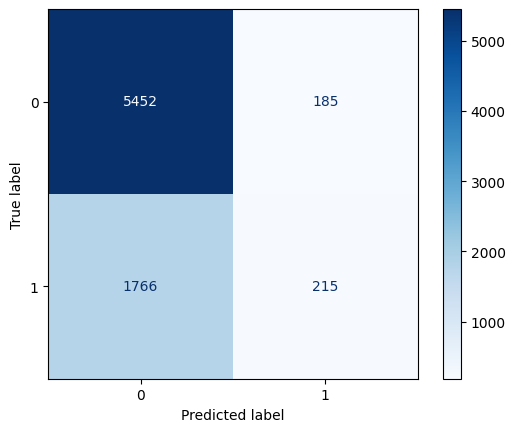

In [8]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 모델 초기화
TRCMWS_model = lgb.LGBMClassifier(
    n_estimators=1478,
    num_leaves=11,
    max_depth=497,
    learning_rate=0.0048921898949450295,
    min_child_samples=52,
    subsample=0.2958341953595713,
    colsample_bytree=0.4650363493369273,
    reg_alpha=0.01359034532674899,
    reg_lambda=0.2086264875309111,
    min_split_gain=0.0008464246397739613,
    random_state=42,
    boosting_type='gbdt',
    verbose=-1
)

# 모델 학습
TRCMWS_model.fit(TRCMWS_X_train, TRCMWS_y_train)

# 예측
y_pred = TRCMWS_model.predict(TRCMWS_X_test)
y_pred_proba = TRCMWS_model.predict_proba(TRCMWS_X_test)[:, 1]

# 평가
accuracy = accuracy_score(TRCMWS_y_test, y_pred)
f1 = f1_score(TRCMWS_y_test, y_pred)
auc = roc_auc_score(TRCMWS_y_test, y_pred_proba)
cm = confusion_matrix(TRCMWS_y_test, y_pred)

# 결과 출력
print()
print("--- Model Performance ---")
print(f"Model Accuracy: {accuracy}")
print(f"Model F1 Score: {f1}")
print(f"Model AUC: {auc}")

# 혼동 행렬 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=TRCMWS_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

TRDQAZ_model


--- Model Performance ---
Model Accuracy: 0.763505710252791
Model F1 Score: 0.2100300042863266
Model AUC: 0.7694598793929485


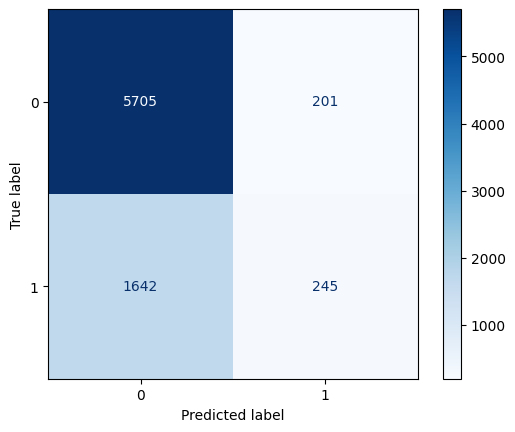

In [9]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 모델 초기화
TRDQAZ_model = lgb.LGBMClassifier(
    n_estimators=3205,
    num_leaves=9,
    max_depth=215,
    learning_rate=0.0038755519893456576,
    min_child_samples=68,
    subsample=0.5273379868258299,
    colsample_bytree=0.4676134478602089,
    reg_alpha=4.775044619514367e-07,
    reg_lambda=4.263034945447689,
    min_split_gain=5.672951756889036e-05,
    random_state=42,
    boosting_type='gbdt',
    verbose=-1
)

# 모델 학습
TRDQAZ_model.fit(TRDQAZ_X_train, TRDQAZ_y_train)

# 예측
y_pred = TRDQAZ_model.predict(TRDQAZ_X_test)
y_pred_proba = TRDQAZ_model.predict_proba(TRDQAZ_X_test)[:, 1]

# 평가
accuracy = accuracy_score(TRDQAZ_y_test, y_pred)
f1 = f1_score(TRDQAZ_y_test, y_pred)
auc = roc_auc_score(TRDQAZ_y_test, y_pred_proba)
cm = confusion_matrix(TRDQAZ_y_test, y_pred)

# 결과 출력
print()
print("--- Model Performance ---")
print(f"Model Accuracy: {accuracy}")
print(f"Model F1 Score: {f1}")
print(f"Model AUC: {auc}")

# 혼동 행렬 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=TRDQAZ_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

TRJXFG_model


--- Model Performance ---
Model Accuracy: 0.7363674205633411
Model F1 Score: 0.16299559471365638
Model AUC: 0.7272526227004533


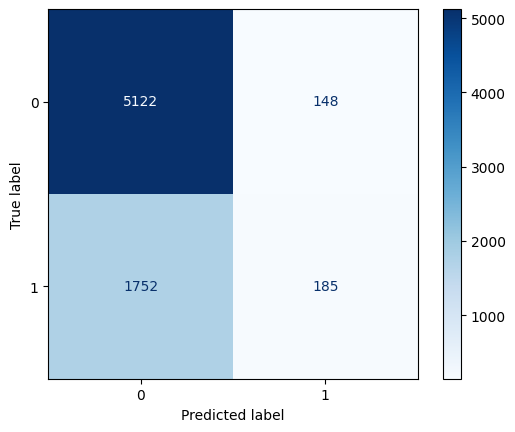

In [10]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 모델 초기화
TRJXFG_model = lgb.LGBMClassifier(
    n_estimators=2678,
    num_leaves=438,
    max_depth=3,
    learning_rate=0.00487936223741294,
    min_child_samples=83,
    subsample=0.5687367455588094,
    colsample_bytree=0.4291691786177755,
    reg_alpha=0.10069765710246925,
    reg_lambda=5.079978254369493e-08,
    min_split_gain=0.45009986918823786,
    random_state=42,
    boosting_type='gbdt',
    verbose=-1
)

# 모델 학습
TRJXFG_model.fit(TRJXFG_X_train, TRJXFG_y_train)

# 예측
y_pred = TRJXFG_model.predict(TRJXFG_X_test)
y_pred_proba = TRJXFG_model.predict_proba(TRJXFG_X_test)[:, 1]

# 평가
accuracy = accuracy_score(TRJXFG_y_test, y_pred)
f1 = f1_score(TRJXFG_y_test, y_pred)
auc = roc_auc_score(TRJXFG_y_test, y_pred_proba)
cm = confusion_matrix(TRJXFG_y_test, y_pred)

# 결과 출력
print()
print("--- Model Performance ---")
print(f"Model Accuracy: {accuracy}")
print(f"Model F1 Score: {f1}")
print(f"Model AUC: {auc}")

# 혼동 행렬 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=TRJXFG_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

TRVNRY_model


--- Model Performance ---
Model Accuracy: 0.7397373876986869
Model F1 Score: 0.14988713318284425
Model AUC: 0.7223776972824638


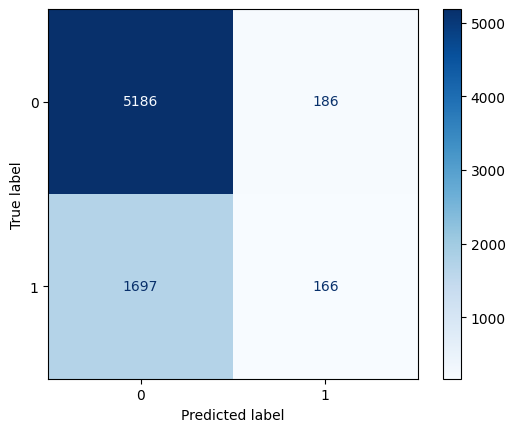

In [11]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 모델 초기화
TRVNRY_model = lgb.LGBMClassifier(
    n_estimators=3359,
    num_leaves=10,
    max_depth=248,
    learning_rate=0.018055658699708182,
    min_child_samples=97,
    subsample=0.7605137227070939,
    colsample_bytree=0.4338019962331505,
    reg_alpha=1.4823366749900515,
    reg_lambda=1.3439693072844653e-07,
    min_split_gain=0.3797472814748956,
    random_state=42,
    boosting_type='gbdt',
    verbose=-1
)

# 모델 학습
TRVNRY_model.fit(TRVNRY_X_train, TRVNRY_y_train)

# 예측
y_pred = TRVNRY_model.predict(TRVNRY_X_test)
y_pred_proba = TRVNRY_model.predict_proba(TRVNRY_X_test)[:, 1]

# 평가
accuracy = accuracy_score(TRVNRY_y_test, y_pred)
f1 = f1_score(TRVNRY_y_test, y_pred)
auc = roc_auc_score(TRVNRY_y_test, y_pred_proba)
cm = confusion_matrix(TRVNRY_y_test, y_pred)

# 결과 출력
print()
print("--- Model Performance ---")
print(f"Model Accuracy: {accuracy}")
print(f"Model F1 Score: {f1}")
print(f"Model AUC: {auc}")

# 혼동 행렬 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=TRVNRY_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

TRXQMD_model


--- Model Performance ---
Model Accuracy: 0.7515073212747632
Model F1 Score: 0.18770530267480057
Model AUC: 0.7188568914915668


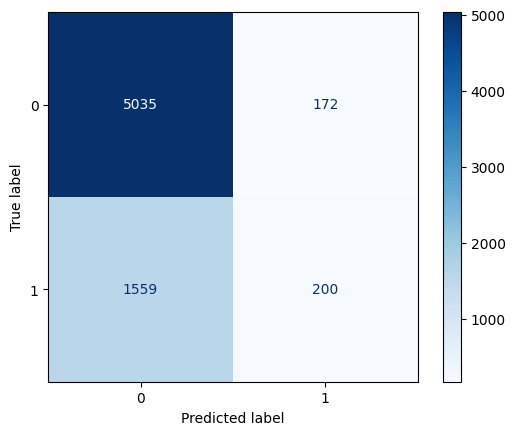

In [12]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 모델 초기화
TRXQMD_model = lgb.LGBMClassifier(
    n_estimators=5374,
    num_leaves=2,
    max_depth=149,
    learning_rate=0.027079336661169923,
    min_child_samples=44,
    subsample=0.8227361351552893,
    colsample_bytree=0.6590472451622268,
    reg_alpha=0.6568161002695931,
    reg_lambda=1.751055467841516e-08,
    min_split_gain=0.021509158668256725,
    random_state=42,
    boosting_type='gbdt',
    verbose=-1
)

# 모델 학습
TRXQMD_model.fit(TRXQMD_X_train, TRXQMD_y_train)

# 예측
y_pred = TRXQMD_model.predict(TRXQMD_X_test)
y_pred_proba = TRXQMD_model.predict_proba(TRXQMD_X_test)[:, 1]

# 평가
accuracy = accuracy_score(TRXQMD_y_test, y_pred)
f1 = f1_score(TRXQMD_y_test, y_pred)
auc = roc_auc_score(TRXQMD_y_test, y_pred_proba)
cm = confusion_matrix(TRXQMD_y_test, y_pred)

# 결과 출력
print()
print("--- Model Performance ---")
print(f"Model Accuracy: {accuracy}")
print(f"Model F1 Score: {f1}")
print(f"Model AUC: {auc}")

# 혼동 행렬 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=TRXQMD_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

TRYBLT_model


--- Model Performance ---
Model Accuracy: 0.7347133324254392
Model F1 Score: 0.20359771054783316
Model AUC: 0.7386668070372451


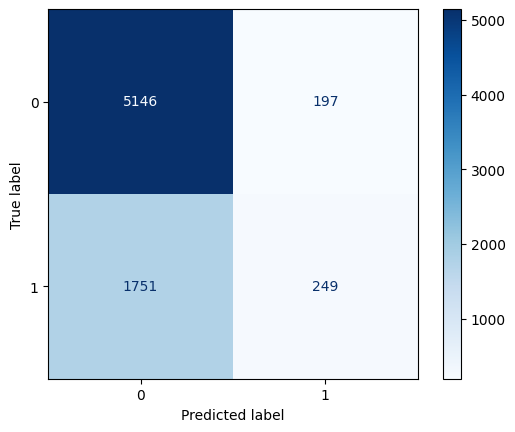

In [13]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 모델 초기화
TRYBLT_model = lgb.LGBMClassifier(
    n_estimators=3645,
    num_leaves=11,
    max_depth=140,
    learning_rate=0.003922666412026588,
    min_child_samples=9,
    subsample=0.7160011662777784,
    colsample_bytree=0.3457498231789885,
    reg_alpha=0.00032739261470649987,
    reg_lambda=1.163035449863064e-08,
    min_split_gain=0.0005418871972396978,
    random_state=42,
    boosting_type='gbdt',
    verbose=-1
)

# 모델 학습
TRYBLT_model.fit(TRYBLT_X_train, TRYBLT_y_train)

# 예측
y_pred = TRYBLT_model.predict(TRYBLT_X_test)
y_pred_proba = TRYBLT_model.predict_proba(TRYBLT_X_test)[:, 1]

# 평가
accuracy = accuracy_score(TRYBLT_y_test, y_pred)
f1 = f1_score(TRYBLT_y_test, y_pred)
auc = roc_auc_score(TRYBLT_y_test, y_pred_proba)
cm = confusion_matrix(TRYBLT_y_test, y_pred)

# 결과 출력
print()
print("--- Model Performance ---")
print(f"Model Accuracy: {accuracy}")
print(f"Model F1 Score: {f1}")
print(f"Model AUC: {auc}")

# 혼동 행렬 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=TRYBLT_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

TRZKPL_model


--- Model Performance ---
Model Accuracy: 0.7466591644394429
Model F1 Score: 0.17949886104783597
Model AUC: 0.7266054928937328


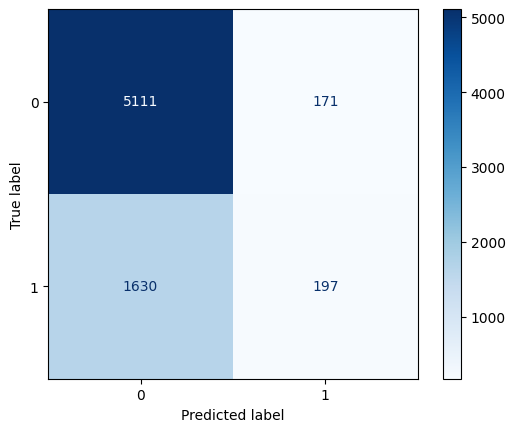

In [14]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 모델 초기화
TRZKPL_model = lgb.LGBMClassifier(
    n_estimators=3050,
    num_leaves=25,
    max_depth=278,
    learning_rate=0.004128406519243726,
    min_child_samples=90,
    subsample=0.7847233684337768,
    colsample_bytree=0.9543623848931228,
    reg_alpha=6.036040312333449,
    reg_lambda=2.0971954122641073e-08,
    min_split_gain=0.2917817627993789,
    random_state=42,
    boosting_type='gbdt',
    verbose=-1
)

# 모델 학습
TRZKPL_model.fit(TRZKPL_X_train, TRZKPL_y_train)

# 예측
y_pred = TRZKPL_model.predict(TRZKPL_X_test)
y_pred_proba = TRZKPL_model.predict_proba(TRZKPL_X_test)[:, 1]

# 평가
accuracy = accuracy_score(TRZKPL_y_test, y_pred)
f1 = f1_score(TRZKPL_y_test, y_pred)
auc = roc_auc_score(TRZKPL_y_test, y_pred_proba)
cm = confusion_matrix(TRZKPL_y_test, y_pred)

# 결과 출력
print()
print("--- Model Performance ---")
print(f"Model Accuracy: {accuracy}")
print(f"Model F1 Score: {f1}")
print(f"Model AUC: {auc}")

# 혼동 행렬 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=TRZKPL_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


--- Model Performance ---
Model Accuracy: 0.7453336193949797
Model F1 Score: 0.18245570095798636
Model AUC: 0.7398010064822962


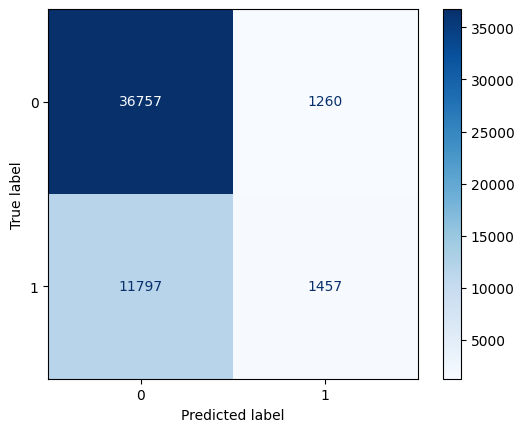

In [15]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 예측
TRCMWS_y_pred = TRCMWS_model.predict(TRCMWS_X_test)
TRCMWS_y_pred_proba = TRCMWS_model.predict_proba(TRCMWS_X_test)[:, 1]

TRDQAZ_y_pred = TRDQAZ_model.predict(TRDQAZ_X_test)
TRDQAZ_y_pred_proba = TRDQAZ_model.predict_proba(TRDQAZ_X_test)[:, 1]

TRJXFG_y_pred = TRJXFG_model.predict(TRJXFG_X_test)
TRJXFG_y_pred_proba = TRJXFG_model.predict_proba(TRJXFG_X_test)[:, 1]

TRVNRY_y_pred = TRVNRY_model.predict(TRVNRY_X_test)
TRVNRY_y_pred_proba = TRVNRY_model.predict_proba(TRVNRY_X_test)[:, 1]

TRXQMD_y_pred = TRXQMD_model.predict(TRXQMD_X_test)
TRXQMD_y_pred_proba = TRXQMD_model.predict_proba(TRXQMD_X_test)[:, 1]

TRYBLT_y_pred = TRYBLT_model.predict(TRYBLT_X_test)
TRYBLT_y_pred_proba = TRYBLT_model.predict_proba(TRYBLT_X_test)[:, 1]

TRZKPL_y_pred = TRZKPL_model.predict(TRZKPL_X_test)
TRZKPL_y_pred_proba = TRZKPL_model.predict_proba(TRZKPL_X_test)[:, 1]

# 예측 결과 병합
y_test = pd.concat([TRCMWS_y_test, TRDQAZ_y_test, TRJXFG_y_test, TRVNRY_y_test, TRXQMD_y_test, TRYBLT_y_test, TRZKPL_y_test])
y_pred = pd.concat([
    pd.Series(TRCMWS_y_pred, index=TRCMWS_y_test.index),
    pd.Series(TRDQAZ_y_pred, index=TRDQAZ_y_test.index),
    pd.Series(TRJXFG_y_pred, index=TRJXFG_y_test.index),
    pd.Series(TRVNRY_y_pred, index=TRVNRY_y_test.index),
    pd.Series(TRXQMD_y_pred, index=TRXQMD_y_test.index),
    pd.Series(TRYBLT_y_pred, index=TRYBLT_y_test.index),
    pd.Series(TRZKPL_y_pred, index=TRZKPL_y_test.index)
])
y_pred_proba = pd.concat([
    pd.Series(TRCMWS_y_pred_proba, index=TRCMWS_y_test.index),
    pd.Series(TRDQAZ_y_pred_proba, index=TRDQAZ_y_test.index),
    pd.Series(TRJXFG_y_pred_proba, index=TRJXFG_y_test.index),
    pd.Series(TRVNRY_y_pred_proba, index=TRVNRY_y_test.index),
    pd.Series(TRXQMD_y_pred_proba, index=TRXQMD_y_test.index),
    pd.Series(TRYBLT_y_pred_proba, index=TRYBLT_y_test.index),
    pd.Series(TRZKPL_y_pred_proba, index=TRZKPL_y_test.index)
])

# 평가
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
cm = confusion_matrix(y_test, y_pred)

# 결과 출력
print()
print("--- Model Performance ---")
print(f"Model Accuracy: {accuracy}")
print(f"Model F1 Score: {f1}")
print(f"Model AUC: {auc}")

# 혼동 행렬 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=TRCMWS_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## 제출

In [16]:
import pandas as pd

# 모델 학습 및 예측
TRCMWS_model.fit(TRCMWS_X, TRCMWS_y)
TRCMWS_pred_proba = TRCMWS_model.predict_proba(TRCMWS_test.drop('ID', axis=1))[:, 1]

TRDQAZ_model.fit(TRDQAZ_X, TRDQAZ_y)
TRDQAZ_pred_proba = TRDQAZ_model.predict_proba(TRDQAZ_test.drop('ID', axis=1))[:, 1]

TRJXFG_model.fit(TRJXFG_X, TRJXFG_y)
TRJXFG_pred_proba = TRJXFG_model.predict_proba(TRJXFG_test.drop('ID', axis=1))[:, 1]

TRVNRY_model.fit(TRVNRY_X, TRVNRY_y)
TRVNRY_pred_proba = TRVNRY_model.predict_proba(TRVNRY_test.drop('ID', axis=1))[:, 1]

TRXQMD_model.fit(TRXQMD_X, TRXQMD_y)
TRXQMD_pred_proba = TRXQMD_model.predict_proba(TRXQMD_test.drop('ID', axis=1))[:, 1]

TRYBLT_model.fit(TRYBLT_X, TRYBLT_y)
TRYBLT_pred_proba = TRYBLT_model.predict_proba(TRYBLT_test.drop('ID', axis=1))[:, 1]

TRZKPL_model.fit(TRZKPL_X, TRZKPL_y)
TRZKPL_pred_proba = TRZKPL_model.predict_proba(TRZKPL_test.drop('ID', axis=1))[:, 1]

# 예측 결과 병합
TRCMWS_test['probability'] = TRCMWS_pred_proba
TRDQAZ_test['probability'] = TRDQAZ_pred_proba
TRJXFG_test['probability'] = TRJXFG_pred_proba
TRVNRY_test['probability'] = TRVNRY_pred_proba
TRXQMD_test['probability'] = TRXQMD_pred_proba
TRYBLT_test['probability'] = TRYBLT_pred_proba
TRZKPL_test['probability'] = TRZKPL_pred_proba

In [17]:
# 최종 제출 파일 생성
submission = pd.concat([
    TRCMWS_test[['ID', 'probability']],
    TRDQAZ_test[['ID', 'probability']],
    TRJXFG_test[['ID', 'probability']],
    TRVNRY_test[['ID', 'probability']],
    TRXQMD_test[['ID', 'probability']],
    TRYBLT_test[['ID', 'probability']],
    TRZKPL_test[['ID', 'probability']]
], axis=0)
submission = submission.sort_values(by='ID')

# 제출 파일 저장
submission.to_csv('../submission/code25_tun_submit.csv', index=False, encoding='utf-8')

데이콘 PUBLIC 0.7366029348

.